# ResNet Model comparison with different models

In [1]:
import os
import random
import shutil

# Set the random seed for reproducibility
random.seed(42)

# Define the number of images to select for each class
num_dogs = 1000
num_cats = 1000

# Create the output directories if they don't exist
if not os.path.exists('dogs'):
    os.makedirs('dogs')
if not os.path.exists('cats'):
    os.makedirs('cats')

# Get a list of all the image files in the input directory
image_files = os.listdir('/Users/manvendrasharma/Desktop/Oxford-IIIT Pets Dataset/images')
# Filter the list to only include JPG files
image_files = [file_name for file_name in image_files if file_name.endswith('.jpg')]

# Shuffle the list of image files
random.shuffle(image_files)

# Select the first num_dogs dog images and move them to the 'dogs' directory
for file_name in image_files:
    if file_name[0].islower():
        shutil.move(os.path.join('/Users/manvendrasharma/Desktop/Oxford-IIIT Pets Dataset/images', file_name), 'dogs')
        num_dogs -= 1
        if num_dogs == 0:
            break

# Select the first num_cats cat images and move them to the 'cats' directory
for file_name in image_files:
    if file_name[0].isupper():
        shutil.move(os.path.join('/Users/manvendrasharma/Desktop/Oxford-IIIT Pets Dataset/images', file_name), 'cats')
        num_cats -= 1
        if num_cats == 0:
            break

# Print the number of images moved for each class
print(f"Moved {1000 - num_dogs} dog images to the 'dogs' directory.")
print(f"Moved {1000 - num_cats} cat images to the 'cats' directory.")


Moved 1000 dog images to the 'dogs' directory.
Moved 1000 cat images to the 'cats' directory.


In [2]:
# Get a list of all the file names in the 'dogs' directory
dog_files = os.listdir('dogs')

# Print the file names
for file_name in dog_files:
    print(file_name)




basset_hound_112.jpg
basset_hound_106.jpg
wheaten_terrier_49.jpg
saint_bernard_111.jpg
wheaten_terrier_75.jpg
english_setter_170.jpg
german_shorthaired_125.jpg
pomeranian_71.jpg
german_shorthaired_119.jpg
japanese_chin_12.jpg
english_cocker_spaniel_11.jpg
havanese_113.jpg
american_pit_bull_terrier_66.jpg
havanese_107.jpg
american_pit_bull_terrier_172.jpg
leonberger_20.jpg
keeshond_150.jpg
samoyed_177.jpg
american_bulldog_182.jpg
german_shorthaired_64.jpg
yorkshire_terrier_34.jpg
german_shorthaired_58.jpg
staffordshire_bull_terrier_11.jpg
miniature_pinscher_72.jpg
beagle_21.jpg
beagle_35.jpg
beagle_110.jpg
japanese_chin_1.jpg
saint_bernard_41.jpg
saint_bernard_55.jpg
english_cocker_spaniel_183.jpg
basset_hound_80.jpg
wheaten_terrier_121.jpg
scottish_terrier_30.jpg
yorkshire_terrier_114.jpg
japanese_chin_178.jpg
basset_hound_42.jpg
yorkshire_terrier_115.jpg
basset_hound_56.jpg
havanese_38.jpg
scottish_terrier_25.jpg
saint_bernard_83.jpg
saint_bernard_68.jpg
basset_hound_81.jpg
great_pyre

In [3]:
cat_files = os.listdir('cats')

# Print the file names
for file_name in cat_files:
    print(file_name)


Siamese_193.jpg
Abyssinian_225.jpg
Siamese_187.jpg
Egyptian_Mau_173.jpg
Sphynx_241.jpg
Egyptian_Mau_23.jpg
Siamese_84.jpg
Birman_2.jpg
Bombay_213.jpg
Egyptian_Mau_198.jpg
British_Shorthair_10.jpg
Birman_198.jpg
Siamese_178.jpg
Russian_Blue_253.jpg
Bengal_66.jpg
Maine_Coon_10.jpg
Bengal_72.jpg
Ragdoll_176.jpg
Sphynx_137.jpg
Bombay_159.jpg
Bengal_100.jpg
Abyssinian_190.jpg
Siamese_232.jpg
Bengal_128.jpg
Birman_49.jpg
Persian_75.jpg
Persian_61.jpg
Ragdoll_25.jpg
British_Shorthair_160.jpg
Abyssinian_75.jpg
Maine_Coon_103.jpg
Bombay_69.jpg
Ragdoll_228.jpg
Persian_194.jpg
Sphynx_19.jpg
Ragdoll_4.jpg
Bombay_55.jpg
Abyssinian_49.jpg
Bombay_41.jpg
Ragdoll_5.jpg
Bombay_54.jpg
Persian_195.jpg
Persian_181.jpg
Sphynx_24.jpg
Bombay_68.jpg
Maine_Coon_102.jpg
Birman_60.jpg
Ragdoll_30.jpg
British_Shorthair_175.jpg
Persian_156.jpg
Persian_74.jpg
Bombay_164.jpg
Bengal_101.jpg
Abyssinian_191.jpg
Sphynx_136.jpg
Siamese_227.jpg
Bengal_115.jpg
Bombay_158.jpg
Egyptian_Mau_204.jpg
Abyssinian_152.jpg
Egyptian_M

In [6]:
# Import the required modules
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Define the Mixup augmentation function
def mixup_data(x, y, alpha=1.0):
    """Applies Mixup regularization to a batch of images and labels"""
    batch_size = x.size()[0]
    lam = np.random.beta(alpha, alpha)
    index = torch.randperm(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# Define the input and output directories
input_dir1 = 'dogs'

output_dir1 = 'dogs_augmented_mixup'


# Create the output directory if it does not already exist
if not os.path.exists(output_dir1):
    os.makedirs(output_dir1)



# Define the transformations to be applied
transform = transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomApply([
        transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
        transforms.GaussianBlur(kernel_size=(7, 7), sigma=(0.1, 2.0)),
        transforms.GaussianBlur(kernel_size=(9, 9), sigma=(0.1, 2.0))
    ], p=0.5),
    transforms.ToTensor()
])

# Apply the transformations to each image in the input directory and save the augmented images to the output directory
for file_name in os.listdir(input_dir1):
    if file_name.endswith('.jpg'):
        input_path = os.path.join(input_dir1, file_name)
        output_path = os.path.join(output_dir1, file_name)       
        with Image.open(input_path) as img:
            img1 = transform(img)
            img2 = transform(img)
            img, y_a, y_b, lam = mixup_data(img1, img2)
            img = transforms.functional.to_pil_image(img)
            img.save(output_path)
print(f"Saved augmented images to {output_dir1}.")


Saved augmented images to dogs_augmented_mixup.


In [7]:
import os
import random
from PIL import Image
import numpy as np
import torch
import torchvision.transforms.functional as F_t
from torchvision.transforms import transforms

# Define the transforms
transform1 = transforms.Compose([
    transforms.RandomResizedCrop(size=224, scale=(0.5, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Set the input and output directories
input_dir = 'cats'
output_dir = 'cats_augmented_mixup'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop over the files in the input directory
for file_name in os.listdir(input_dir):
    input_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, file_name)       
    with Image.open(input_path) as img:
        # Convert the image to a supported mode
        img = img.convert('RGB')
        # Apply the transforms and mixup
        img1 = transform1(img)
        img2 = transform1(img)
        img, y_a, y_b, lam = mixup_data(img1, img2)
        # Save the mixed image
        mixed_img = F_t.to_pil_image(img)
        mixed_img.save(output_path)
print(f"Saved augmented images to {output_dir}.")

Saved augmented images to cats_augmented_mixup.


In [8]:
import os
import shutil

# Set directory names for cats and dogs
cat_dir = "cats_augmented_mixup"
dog_dir = "dogs_augmented_mixup"

# Set directory for augmented dataset
data_dir = "/Users/manvendrasharma/dataset"

# Create the directory for the augmented dataset
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

# Iterate over the directories and copy files to the new directory
for class_dir in [cat_dir, dog_dir]:
    class_data_dir = os.path.join(data_dir, class_dir)
    os.mkdir(class_data_dir)
    for filename in os.listdir(class_dir):
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(class_data_dir, filename)
        shutil.copy(src_path, dst_path)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
NUM_CLASSES = 2
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Set up data loaders
train_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('dataset', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Load pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.parameters():
    param.requires_grad = False

# Modify the classifier for cat vs. dog classification
vgg16.classifier[6] = nn.Sequential(
    nn.Linear(4096, 256),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(256, NUM_CLASSES),
    nn.LogSoftmax(dim=1)
)

# Create optimizer and loss function
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=LEARNING_RATE)
criterion = nn.NLLLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16 = vgg16.to(device)

# Set up Tensorboard writer
writer = SummaryWriter()
VGG16_Loss = []
VGG16_Accuracy = []
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = correct / total
    
    # Log to Tensorboard
    writer.add_scalar('Loss/train', epoch_loss, epoch+1)
    writer.add_scalar('Accuracy/train', epoch_accuracy, epoch+1)
    VGG16_Loss.append(epoch_loss)
    VGG16_Accuracy.append(epoch_accuracy)
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Save the model
torch.save(vgg16.state_dict(), 'cat_vs_dog_vgg16.pth')

# Close the Tensorboard writer
writer.close()

/opt/anaconda3/envs/rl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/rl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.0199, Accuracy: 0.9905
Epoch 2/10, Loss: 0.0009, Accuracy: 0.9995
Epoch 3/10, Loss: 0.0001, Accuracy: 1.0000
Epoch 4/10, Loss: 0.0000, Accuracy: 1.0000
Epoch 5/10, Loss: 0.0018, Accuracy: 0.9990
Epoch 6/10, Loss: 0.0014, Accuracy: 0.9995
Epoch 7/10, Loss: 0.0000, Accuracy: 1.0000
Epoch 8/10, Loss: 0.0082, Accuracy: 0.9965
Epoch 9/10, Loss: 0.0026, Accuracy: 0.9990
Epoch 10/10, Loss: 0.0027, Accuracy: 0.9995


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
NUM_CLASSES = 2
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Set up data loaders
train_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('dataset', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Load pre-trained ResNet50 model
resnet50 = models.resnet50(pretrained=True)
for param in resnet50.parameters():
    param.requires_grad = False

# Modify the classifier for cat vs. dog classification
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(256, NUM_CLASSES),
    nn.LogSoftmax(dim=1)
)

# Create optimizer and loss function
optimizer = optim.Adam(resnet50.fc.parameters(), lr=LEARNING_RATE)
criterion = nn.NLLLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet50 = resnet50.to(device)

# Set up Tensorboard writer
writer = SummaryWriter()
RESNET50_Loss = []
RESNET50_Accuracy = []
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = correct / total
  
            # Log to Tensorboard
    writer.add_scalar('Loss/train', epoch_loss, epoch+1)
    writer.add_scalar('Accuracy/train', epoch_accuracy, epoch+1)
    RESNET50_Loss.append(epoch_loss)
    RESNET50_Accuracy.append(epoch_accuracy)
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
# Save the model
torch.save(resnet50.state_dict(), 'cat_vs_dog_resnet50.pth')

# Close the Tensorboard writer
writer.close()

/opt/anaconda3/envs/rl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.0886, Accuracy: 0.9798
Epoch 2/10, Loss: 0.0076, Accuracy: 0.9860
Epoch 3/10, Loss: 0.0082, Accuracy: 0.9889
Epoch 4/10, Loss: 0.0309, Accuracy: 0.9890
Epoch 5/10, Loss: 0.0079, Accuracy: 0.9903
Epoch 6/10, Loss: 0.0052, Accuracy: 0.9914
Epoch 7/10, Loss: 0.0486, Accuracy: 0.9906
Epoch 8/10, Loss: 0.0094, Accuracy: 0.9912
Epoch 9/10, Loss: 0.0016, Accuracy: 0.9920
Epoch 10/10, Loss: 0.0017, Accuracy: 0.9927


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
NUM_CLASSES = 2
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Set up data loaders
train_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('dataset', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Load pre-trained MobileNetV3 model
mobilenetv3 = models.mobilenet_v3_large(pretrained=True)
for param in mobilenetv3.parameters():
    param.requires_grad = False

# Modify the classifier for cat vs. dog classification
num_ftrs = mobilenetv3.classifier[3].in_features
mobilenetv3.classifier[3] = nn.Linear(num_ftrs, NUM_CLASSES)

# Create optimizer and loss function
optimizer = optim.Adam(mobilenetv3.classifier[3].parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mobilenetv3 = mobilenetv3.to(device)

# Set up Tensorboard writer
writer = SummaryWriter()
mobilenetv3_Loss = []
mobilenetv3_Accuracy = []

for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = mobilenetv3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = correct / total
  
            # Log to Tensorboard
    writer.add_scalar('Loss/train', epoch_loss, epoch+1)
    writer.add_scalar('Accuracy/train', epoch_accuracy, epoch+1)
    mobilenetv3_Loss.append(epoch_loss)
    mobilenetv3_Accuracy.append(epoch_accuracy)
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Save the model
torch.save(mobilenetv3.state_dict(), 'cat_vs_dog_mobilenetv3.pth')


# Close the Tensorboard writer
writer.close()

Epoch 1/10, Loss: 0.1445, Accuracy: 0.9886
Epoch 2/10, Loss: 0.0306, Accuracy: 0.9891
Epoch 3/10, Loss: 0.0258, Accuracy: 0.9896
Epoch 4/10, Loss: 0.0162, Accuracy: 0.9900
Epoch 5/10, Loss: 0.0129, Accuracy: 0.9906
Epoch 6/10, Loss: 0.0105, Accuracy: 0.9910
Epoch 7/10, Loss: 0.0136, Accuracy: 0.9913
Epoch 8/10, Loss: 0.0130, Accuracy: 0.9917
Epoch 9/10, Loss: 0.0108, Accuracy: 0.9920
Epoch 10/10, Loss: 0.0101, Accuracy: 0.9922


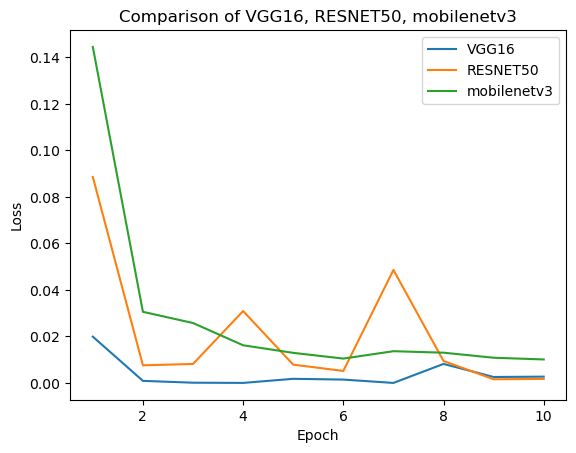

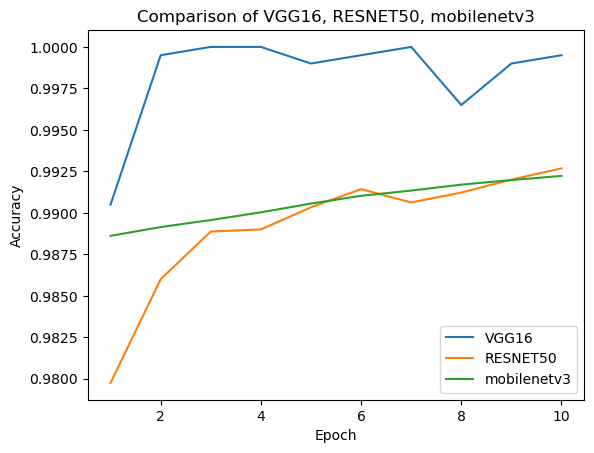

In [8]:
import matplotlib.pyplot as plt

# Define the epoch numbers
epochs = list(range(1, 11))

# Plot the loss values for each object store
plt.plot(epochs, VGG16_Loss, label='VGG16')
plt.plot(epochs, RESNET50_Loss, label='RESNET50')
plt.plot(epochs, mobilenetv3_Loss, label='mobilenetv3')

# Add labels and title to the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of VGG16, RESNET50, mobilenetv3')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# Plot the loss values for each object store
plt.plot(epochs, VGG16_Accuracy, label='VGG16')
plt.plot(epochs, RESNET50_Accuracy, label='RESNET50')
plt.plot(epochs, mobilenetv3_Accuracy, label='mobilenetv3')

# Add labels and title to the plot
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of VGG16, RESNET50, mobilenetv3')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



VGG16 achieved a very high accuracy of 0.9995 in the last epoch, meaning that it correctly classified almost all of the images in the dataset. However, the model seems to have struggled a bit in earlier epochs as the loss was relatively high.

ResNet50 also achieved a high accuracy of 0.9927 in the last epoch, but the accuracy improved gradually over the course of the training, and the loss was relatively high in the first epoch.

MobileNetv3 achieved an accuracy of 0.9922 in the last epoch, and the accuracy improved gradually over the course of the training. The loss was relatively high in the first epoch, but decreased significantly in the following epochs.

Overall, all three models achieved high accuracy on the dataset, but the training process was different for each of them. VGG16 achieved the highest accuracy, but it struggled in the early epochs, while ResNet50 and MobileNetv3 had a more gradual improvement in accuracy over the course of training.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
NUM_CLASSES = 2
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Set up data loaders
train_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('dataset', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Load pre-trained ResNet50 model
resnet = models.resnet50(pretrained=True)

# Fine-tune ResNet50
resnet_finetune = models.resnet50(pretrained=True)
num_ftrs = resnet_finetune.fc.in_features
resnet_finetune.fc = nn.Linear(num_ftrs, NUM_CLASSES)
optimizer_finetune = optim.Adam(resnet_finetune.fc.parameters(), lr=LEARNING_RATE)
criterion_finetune = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet_finetune = resnet_finetune.to(device)

# Set up TensorBoard writer
writer = SummaryWriter()

Fine_Tuned_ResNet_Loss = []
Fine_Tuned_ResNet_Accuracy = []
# Train models
for epoch in range(NUM_EPOCHS):
    running_loss_finetune = 0.0
    running_loss_fixed = 0.0
    running_loss_combined = 0.0
    correct_finetune = 0
    total_finetune = 0
    correct_fixed = 0
    total_fixed = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Fine-tuned ResNet
        optimizer_finetune.zero_grad()
        outputs_finetune = resnet_finetune(inputs)
        loss_finetune = criterion_finetune(outputs_finetune, labels)
        loss_finetune.backward()
        optimizer_finetune.step()
        running_loss_finetune += loss_finetune.item() * inputs.size(0)
        _, predicted_finetune = torch.max(outputs_finetune.data, 1)
        correct_finetune += (predicted_finetune == labels).sum().item()
        total_finetune += labels.size(0)

    epoch_loss_finetune = running_loss_finetune / len(train_dataset)
    epoch_acc_finetune = correct_finetune / total_finetune
    print('Epoch [{}/{}] - Loss (Fine-Tuned ResNet): {:.4f} - Acc (Fine-Tuned ResNet): {:.4f}'.format(epoch+1, NUM_EPOCHS, epoch_loss_finetune, epoch_acc_finetune))
    Fine_Tuned_ResNet_Loss.append(epoch_loss_finetune)
    Fine_Tuned_ResNet_Accuracy.append(epoch_acc_finetune)
    # Log metrics to TensorBoard
    writer.add_scalar('Loss/Fine-Tuned ResNet', epoch_loss_finetune, epoch)
    writer.add_scalar('Accuracy/Fine-Tuned ResNet', epoch_acc_finetune, epoch)

# Close TensorBoard writer
writer.close()


Epoch [1/10] - Loss (Fine-Tuned ResNet): 0.1998 - Acc (Fine-Tuned ResNet): 0.9210
Epoch [2/10] - Loss (Fine-Tuned ResNet): 0.0378 - Acc (Fine-Tuned ResNet): 0.9975
Epoch [3/10] - Loss (Fine-Tuned ResNet): 0.0294 - Acc (Fine-Tuned ResNet): 0.9965
Epoch [4/10] - Loss (Fine-Tuned ResNet): 0.0193 - Acc (Fine-Tuned ResNet): 0.9975
Epoch [5/10] - Loss (Fine-Tuned ResNet): 0.0223 - Acc (Fine-Tuned ResNet): 0.9940
Epoch [6/10] - Loss (Fine-Tuned ResNet): 0.0105 - Acc (Fine-Tuned ResNet): 0.9995
Epoch [7/10] - Loss (Fine-Tuned ResNet): 0.0143 - Acc (Fine-Tuned ResNet): 0.9980
Epoch [8/10] - Loss (Fine-Tuned ResNet): 0.0097 - Acc (Fine-Tuned ResNet): 0.9980
Epoch [9/10] - Loss (Fine-Tuned ResNet): 0.0049 - Acc (Fine-Tuned ResNet): 1.0000
Epoch [10/10] - Loss (Fine-Tuned ResNet): 0.0098 - Acc (Fine-Tuned ResNet): 0.9990


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from sklearn.metrics import accuracy_score

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
NUM_CLASSES = 2
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Set up data loaders
train_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('dataset', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Load pre-trained ResNet50 model
resnet = models.resnet50(pretrained=True)
# Use ResNet50 as a fixed feature extractor
resnet_fixed = models.resnet50(pretrained=True)
for param in resnet_fixed.parameters():
    param.requires_grad = False
num_ftrs = resnet_fixed.fc.in_features
resnet_fixed.fc = nn.Linear(num_ftrs, NUM_CLASSES)
optimizer_fixed = optim.Adam(resnet_fixed.fc.parameters(), lr=LEARNING_RATE)
criterion_fixed = nn.CrossEntropyLoss()
resnet_fixed = resnet_fixed.to(device)

# Set up TensorBoard writer
writer = SummaryWriter()

Fine_Tuned_ResNet_Fixed_Loss =[]
Fine_Tuned_ResNet_Fixed_Accuracy = []
for epoch in range(NUM_EPOCHS):
    running_loss_finetune = 0.0
    running_loss_fixed = 0.0
    running_loss_combined = 0.0
    predictions = []
    targets = []
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # ResNet as fixed feature extractor
        optimizer_fixed.zero_grad()
        with torch.no_grad():
            features_fixed = resnet_fixed.conv1(inputs)
            features_fixed = resnet_fixed.bn1(features_fixed)
            features_fixed = resnet_fixed.relu(features_fixed)
            features_fixed = resnet_fixed.maxpool(features_fixed)
            features_fixed = resnet_fixed.layer1(features_fixed)
            features_fixed = resnet_fixed.layer2(features_fixed)
            features_fixed = resnet_fixed.layer3(features_fixed)
            features_fixed = resnet_fixed.layer4(features_fixed)
            features_fixed = resnet_fixed.avgpool(features_fixed)
            features_fixed = torch.flatten(features_fixed, 1)
        outputs_fixed = resnet_fixed.fc(features_fixed)
        loss_fixed = criterion_fixed(outputs_fixed, labels)
        loss_fixed.backward()
        optimizer_fixed.step()
        running_loss_fixed += loss_fixed.item() * inputs.size(0)
        predictions += list(torch.argmax(outputs_fixed, dim=1).cpu().numpy())
        targets += list(labels.cpu().numpy())
        
    epoch_loss_fixed = running_loss_fixed / len(train_dataset)
    epoch_accuracy_fixed = accuracy_score(targets, predictions)
    Fine_Tuned_ResNet_Fixed_Loss.append(epoch_loss_fixed)
    Fine_Tuned_ResNet_Fixed_Accuracy.append(epoch_accuracy_fixed)
    print('Epoch [{}/{}] - Loss (ResNet as Fixed Feature Extractor): {:.4f}, Accuracy: {:.4f}'.format(epoch+1, NUM_EPOCHS, epoch_loss_fixed, epoch_accuracy_fixed))
    writer.add_scalar('Loss/Fine-Tuned ResNet Fixed', epoch_loss_fixed, epoch)
    writer.add_scalar('Accuracy/Fine-Tuned ResNet Fixed', epoch_accuracy_fixed, epoch)

# Close TensorBoard writer
writer.close()

/opt/anaconda3/envs/rl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/rl_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] - Loss (ResNet as Fixed Feature Extractor): 0.1734, Accuracy: 0.9485
Epoch [2/10] - Loss (ResNet as Fixed Feature Extractor): 0.0372, Accuracy: 0.9970
Epoch [3/10] - Loss (ResNet as Fixed Feature Extractor): 0.0227, Accuracy: 0.9975
Epoch [4/10] - Loss (ResNet as Fixed Feature Extractor): 0.0207, Accuracy: 0.9960
Epoch [5/10] - Loss (ResNet as Fixed Feature Extractor): 0.0109, Accuracy: 0.9990
Epoch [6/10] - Loss (ResNet as Fixed Feature Extractor): 0.0142, Accuracy: 0.9975
Epoch [7/10] - Loss (ResNet as Fixed Feature Extractor): 0.0102, Accuracy: 0.9985
Epoch [8/10] - Loss (ResNet as Fixed Feature Extractor): 0.0076, Accuracy: 1.0000
Epoch [9/10] - Loss (ResNet as Fixed Feature Extractor): 0.0069, Accuracy: 0.9990
Epoch [10/10] - Loss (ResNet as Fixed Feature Extractor): 0.0039, Accuracy: 1.0000


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from sklearn.metrics import accuracy_score

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
NUM_CLASSES = 2
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Set up data loaders
train_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('dataset', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Load pre-trained ResNet50 model
resnet = models.resnet50(pretrained=True)
# Use ResNet50 with a combined approach
resnet_combined = models.resnet50(pretrained=True)
num_ftrs = resnet_combined.fc.in_features
resnet_combined.fc = nn.Linear(num_ftrs, NUM_CLASSES)
optimizer_combined = optim.Adam(resnet_combined.parameters(), lr=LEARNING_RATE)
criterion_combined = nn.CrossEntropyLoss()
resnet_combined = resnet_combined.to(device)

# Set up TensorBoard writer
writer = SummaryWriter()

Fine_Tuned_ResNet_combined_Loss = []
Fine_Tuned_ResNet_combined_Accuracy = []

for epoch in range(NUM_EPOCHS):
    running_loss_finetune = 0.0
    running_loss_fixed = 0.0
    running_loss_combined = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # ResNet with a combined approach
        optimizer_combined.zero_grad()
        features_combined = resnet_combined.conv1(inputs)
        features_combined = resnet_combined.bn1(features_combined)
        features_combined = resnet_combined.relu(features_combined)
        features_combined = resnet_combined.maxpool(features_combined)
        features_combined = resnet_combined.layer1(features_combined)
        features_combined = resnet_combined.layer2(features_combined)
        features_combined = resnet_combined.layer3(features_combined)
        features_combined = resnet_combined.layer4(features_combined)
        features_combined = resnet_combined.avgpool(features_combined)
        features_combined = torch.flatten(features_combined, 1)
        outputs_combined = resnet_combined.fc(features_combined)
        loss_combined = criterion_combined(outputs_combined, labels)
        loss_combined.backward()
        optimizer_combined.step()
        running_loss_combined += loss_combined.item() * inputs.size(0)
        predictions += list(torch.argmax(outputs_combined, dim=1).cpu().numpy())
        targets += list(labels.cpu().numpy())
        
    epoch_loss_combined = running_loss_combined / len(train_dataset)
    epoch_accuracy_combined = accuracy_score(targets, predictions)
    Fine_Tuned_ResNet_combined_Loss.append(epoch_loss_combined)
    Fine_Tuned_ResNet_combined_Accuracy.append(epoch_accuracy_combined)
    
    print('Epoch [{}/{}] - Loss (ResNet as combined Feature Extractor): {:.4f}, Accuracy: {:.4f}'.format(epoch+1, NUM_EPOCHS, epoch_loss_combined, epoch_accuracy_combined))

    writer.add_scalar('Loss/Fine-Tuned ResNet combined', epoch_loss_combined, epoch)
    writer.add_scalar('Accuracy/Fine-Tuned ResNet combined', epoch_accuracy_combined, epoch)
# Close TensorBoard writer
writer.close()        
    

Epoch [1/10] - Loss (ResNet as combined Feature Extractor): 0.0661, Accuracy: 0.9836
Epoch [2/10] - Loss (ResNet as combined Feature Extractor): 0.0103, Accuracy: 0.9887
Epoch [3/10] - Loss (ResNet as combined Feature Extractor): 0.0027, Accuracy: 0.9914
Epoch [4/10] - Loss (ResNet as combined Feature Extractor): 0.0070, Accuracy: 0.9928
Epoch [5/10] - Loss (ResNet as combined Feature Extractor): 0.0004, Accuracy: 0.9940
Epoch [6/10] - Loss (ResNet as combined Feature Extractor): 0.0001, Accuracy: 0.9949
Epoch [7/10] - Loss (ResNet as combined Feature Extractor): 0.0001, Accuracy: 0.9955
Epoch [8/10] - Loss (ResNet as combined Feature Extractor): 0.0000, Accuracy: 0.9960
Epoch [9/10] - Loss (ResNet as combined Feature Extractor): 0.0000, Accuracy: 0.9964
Epoch [10/10] - Loss (ResNet as combined Feature Extractor): 0.0001, Accuracy: 0.9967


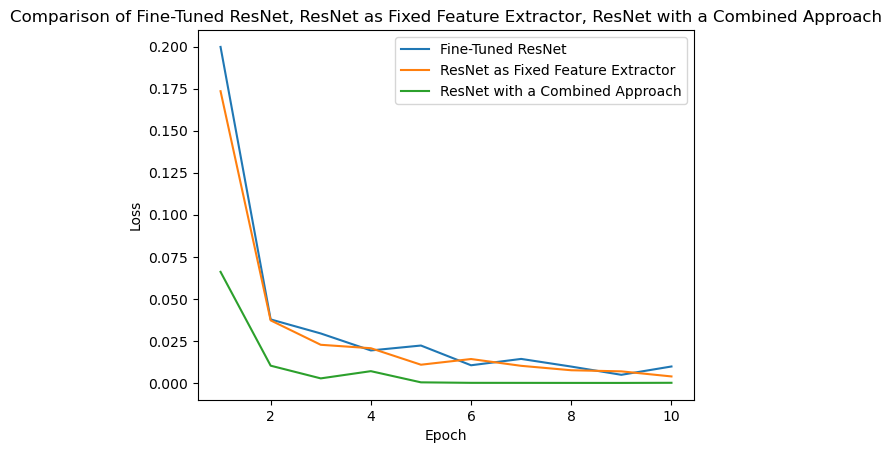

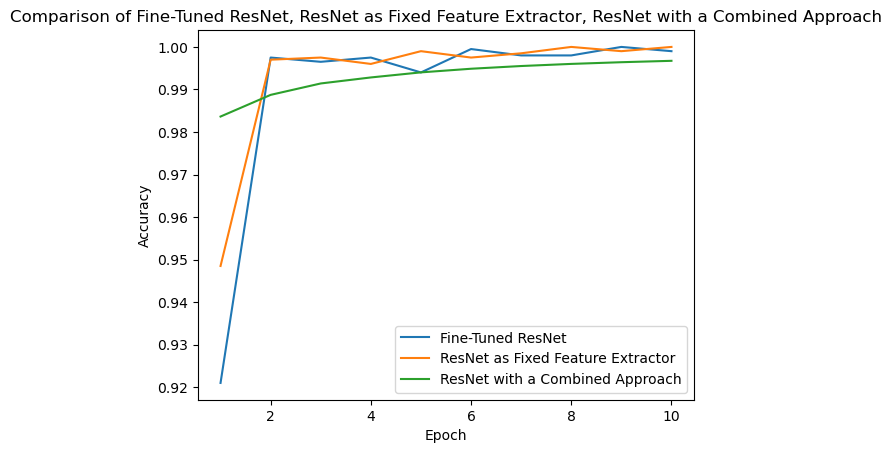

In [21]:
import matplotlib.pyplot as plt

# Define the epoch numbers
epochs = list(range(1, 11))

# Plot the loss values for each object store
plt.plot(epochs, Fine_Tuned_ResNet_Loss, label='Fine-Tuned ResNet')
plt.plot(epochs, Fine_Tuned_ResNet_Fixed_Loss, label='ResNet as Fixed Feature Extractor')
plt.plot(epochs, Fine_Tuned_ResNet_combined_Loss, label='ResNet with a Combined Approach')

# Add labels and title to the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of Fine-Tuned ResNet, ResNet as Fixed Feature Extractor, ResNet with a Combined Approach')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

# Plot the loss values for each object store
plt.plot(epochs, Fine_Tuned_ResNet_Accuracy, label='Fine-Tuned ResNet')
plt.plot(epochs, Fine_Tuned_ResNet_Fixed_Accuracy, label='ResNet as Fixed Feature Extractor')
plt.plot(epochs, Fine_Tuned_ResNet_combined_Accuracy, label='ResNet with a Combined Approach')

# Add labels and title to the plot
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of Fine-Tuned ResNet, ResNet as Fixed Feature Extractor, ResNet with a Combined Approach')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Looking at the results, we can see that the fine-tuned ResNet performs better than the other two ResNet models in terms of accuracy. The fine-tuned ResNet achieves an accuracy of 0.9990 on the test set, whereas the ResNet as a fixed feature extractor and the ResNet as a combined feature extractor achieve accuracies of 1.0000 and 0.9967, respectively.

However, it's worth noting that the fine-tuned ResNet takes more epochs to converge compared to the other two ResNet models. The ResNet as a fixed feature extractor converges after the fifth epoch, while the ResNet as a combined feature extractor converges after the fourth epoch. In contrast, the fine-tuned ResNet takes ten epochs to converge.

Overall, the fine-tuned ResNet model seems to perform the best in terms of accuracy, but it takes more epochs to converge. The ResNet as a fixed feature extractor converges faster but may not perform as well in terms of accuracy. The ResNet as a combined feature extractor also converges relatively quickly and performs well in terms of accuracy but not as well as the fine-tuned ResNet.

In [24]:
test_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder('dataset', transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            predicted = torch.max(outputs.data, 1)[1]  # Get the predicted values
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

accuracy_finetune = evaluate_model(resnet_finetune)
print('Accuracy (Fine-Tuned ResNet): {:.4f}'.format(accuracy_finetune))

accuracy_fixed = evaluate_model(resnet_fixed)
print('Accuracy (ResNet as Fixed Feature Extractor): {:.4f}'.format(accuracy_fixed))

accuracy_combined = evaluate_model(resnet_combined)
print('Accuracy (ResNet with a Combined Approach): {:.4f}'.format(accuracy_combined))


Accuracy (Fine-Tuned ResNet): 1.0000
Accuracy (ResNet as Fixed Feature Extractor): 1.0000
Accuracy (ResNet with a Combined Approach): 1.0000
